# 1 "NETFLIX MOVIES AND TV SERIES ANALYSIS"

type
Movie      5185
TV Show     147
Name: count, dtype: int64


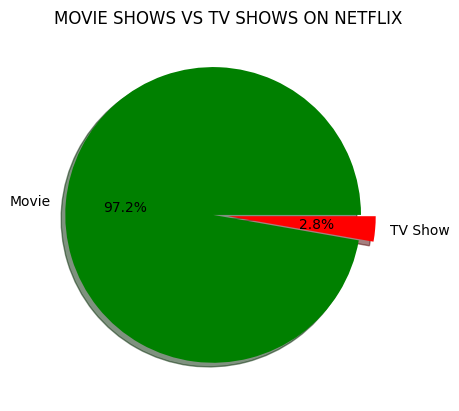

country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64


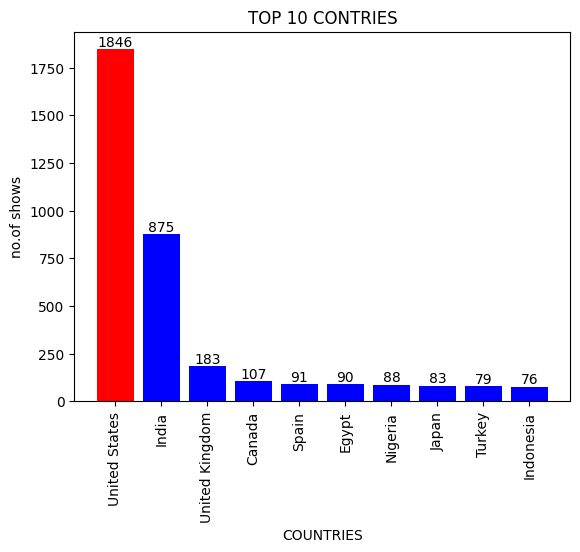

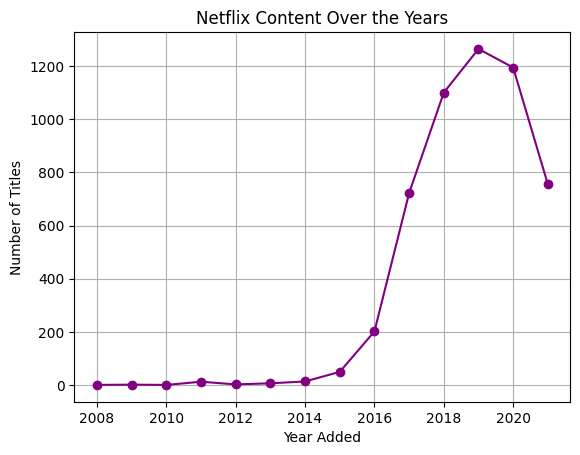

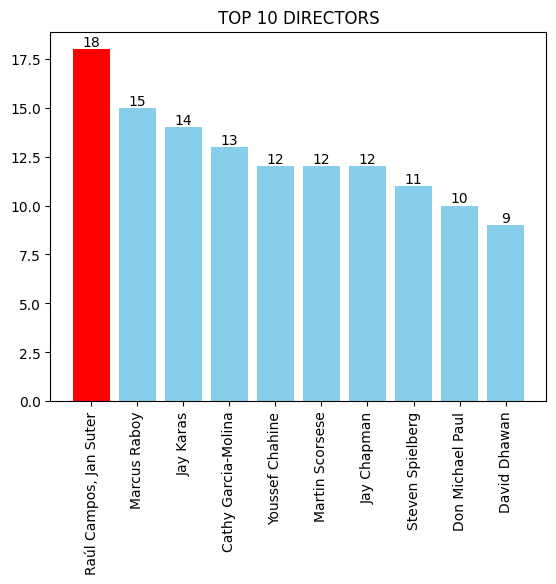

listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: count, dtype: int64


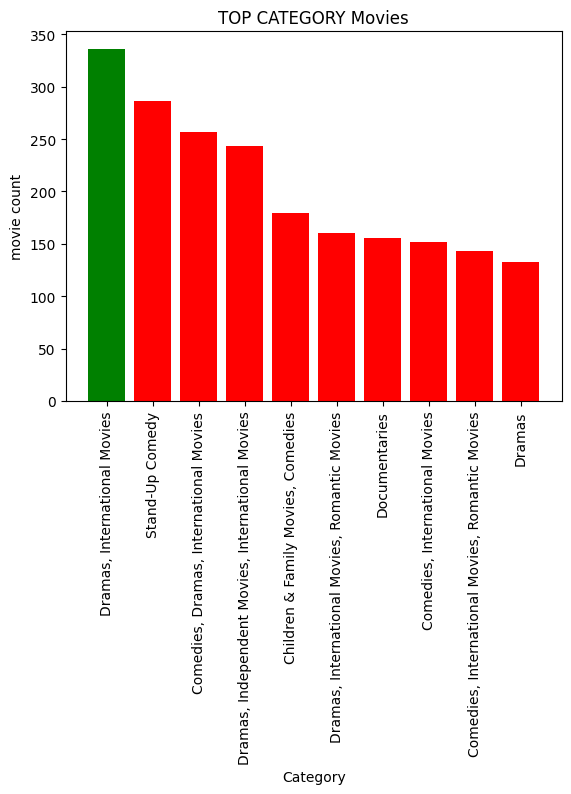

In [59]:
import pandas as pd
import matplotlib.pyplot as plt 

# IMPORTING DATA AND REMOVING NULL VALUES MAKING DATA CLEAN 
data = pd.read_csv("netflix_titles.csv",parse_dates=['date_added'])
df = pd.DataFrame(data)
df.dropna(inplace=True)

# CHEAKING BASIC INFORMATION BY INFO() AND DESCRIBE()
# df.info()
df.shape # (rows,columns)
df.columns

# TV SHOWS (VS) MOVIE SHOWS

by_type = df['type'].value_counts()
print(by_type)

# shows tv shows and movie shows by pie chart
pie = plt.pie(by_type, labels=by_type.index,autopct='%1.1f%%',explode=[0.1,0],shadow=True,colors=["green",'red'])
plt.title("MOVIE SHOWS VS TV SHOWS ON NETFLIX",color="black")
plt.show()

# TOP 10 CONTRIES WITH MOST CONTENT 
top_10 = df['country'].value_counts().head(10)
print(top_10)
top_con = top_10.values.argmax()
colors =['blue'] * len(top_10)
colors[top_con] = 'red'
bar = plt.bar(top_10.index,top_10.values,color=colors)
plt.xlabel("COUNTRIES")
plt.ylabel("no.of shows")
plt.xticks(rotation=90)
plt.title("TOP 10 CONTRIES")
plt.bar_label(bar)
plt.show()

# Safely convert to datetime (handles mixed formats)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year
df['year'] = df['date_added'].dt.year

# Plot yearly content trend
df['year'].value_counts().sort_index().plot(kind="line", marker='o', color='purple')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.title("Netflix Content Over the Years")
plt.grid(True)
plt.show()

# top 10 directors
top_10_dir = df['director'].value_counts().head(10)
max_idx = top_10_dir.values.argmax()
colors = ["skyblue"] * len(top_10_dir)
colors[max_idx] = "red"
bar_2 = plt.bar(top_10_dir.index, top_10_dir.values, color=colors)
plt.xticks(rotation=90)
plt.title("TOP 10 DIRECTORS")
plt.bar_label(bar_2)
plt.show()

# Most gener movies
top_genre = df['listed_in'].value_counts().head(10)
print(top_genre)
max_gen = top_genre.values.argmax()
colors =  ['red'] * (len(top_genre))
colors[max_gen] = 'green'
gbar = plt.bar(top_genre.index,top_genre.values,color= colors)
plt.title('TOP CATEGORY Movies')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel('movie count')
plt.show()


